In [1]:
from sklearn import datasets as ds

iris = ds.load_iris() # wow that was simple to load up!

In [2]:
# let's convert it to a pandas data frame and visualize it
import pandas as pd
import numpy as np

df = pd.DataFrame(iris.data,columns=iris.feature_names)
# add in the class targets and names
df['target'] = iris.target.astype(int)
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


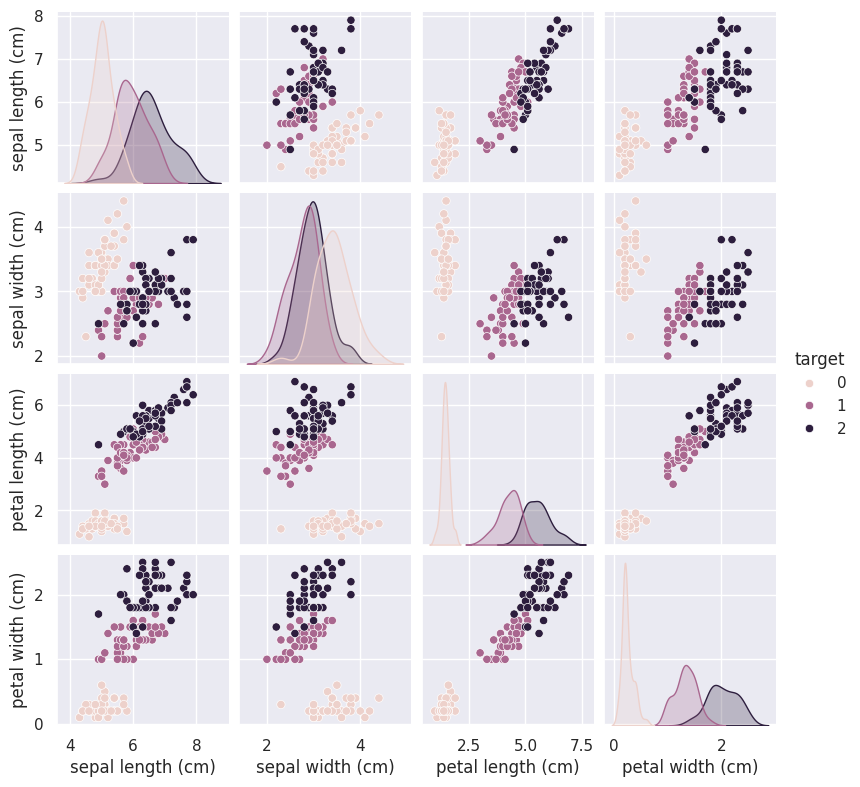

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.pairplot(df, hue="target", height=2)

## Using PCA with sklearn
Now let's use PCA to find the two "best" dimensions of this data
These are linear transforms to help project the features into something more understandable

In [4]:
from sklearn.decomposition import PCA

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:\n', pca.components_)


pca:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Text(0, 0.5, '0.66*sepal length +0.73*sepal width -0.17*petal length -0.08*petal width ')

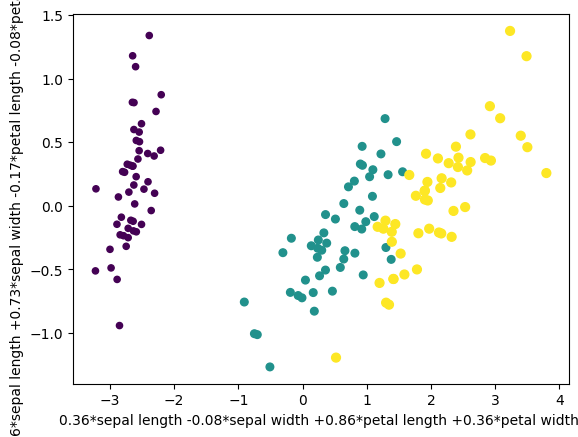

In [5]:
import seaborn as sns
cmap = sns.set(style="darkgrid")

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array

plt.style.use('default')
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, iris.feature_names)

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])


# PCA With Image Data
This is code manipulated from Olivier Grisel's eigen face classification demonstration. You can find the original notebook here: http://nbviewer.ipython.org/github/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb

In [6]:
# fetch the images for the dataset
# this will take a long time the first run because it needs to download
# after the first time, the dataset will be saved to your disk (in sklearn package somewhere)
# if this does not run, you may need additional libraries installed on your system (install at your own risk!!)
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=None)

In [7]:
# get some of the specifics of the dataset
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))
print (125*94) # the size of the images are the size of the feature vectors

0
n_samples: 3023
n_features: 11750
n_classes: 62
Original Image Sizes 125 by 94
11750


So basically each feature vector is a giant image with the rows of the image just stacked one after the other into a giant vector. The image sizes are 125 pixels by 94 pixels. This gives us 125x94=11750 pixels per image.

So we are using each pixel location in the image as a separate feature. That's a lot of features!

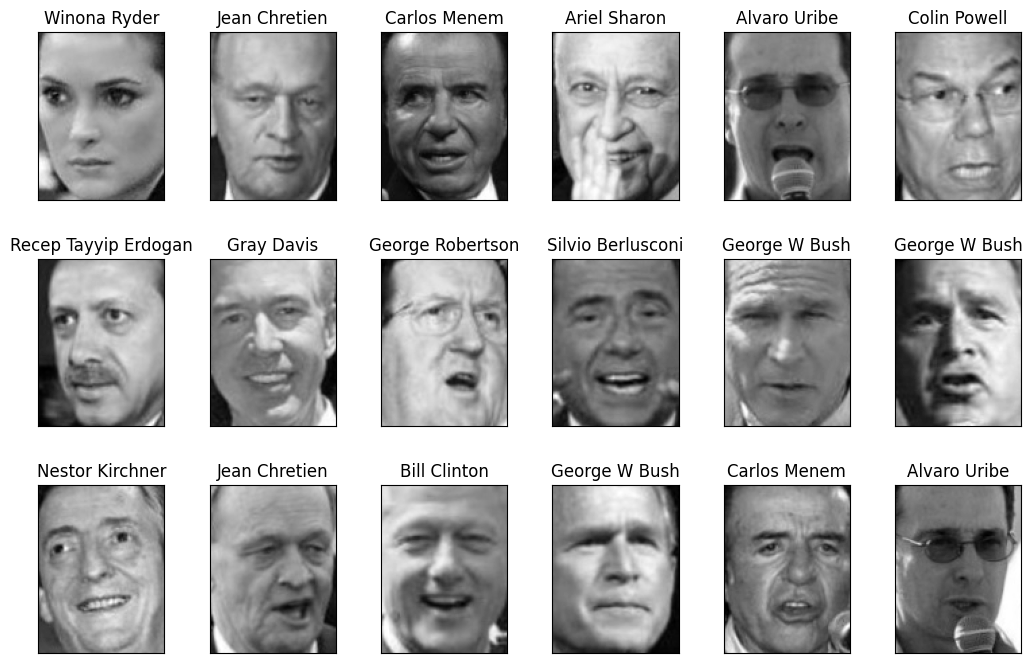

In [8]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names[y], h, w) # defaults to showing a 3 by 6 subset of the faces

## Reconstruct Using Full PCA


In [9]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenfaces from 3023 faces
CPU times: user 14.9 s, sys: 1.9 s, total: 16.8 s
Wall time: 9.11 s


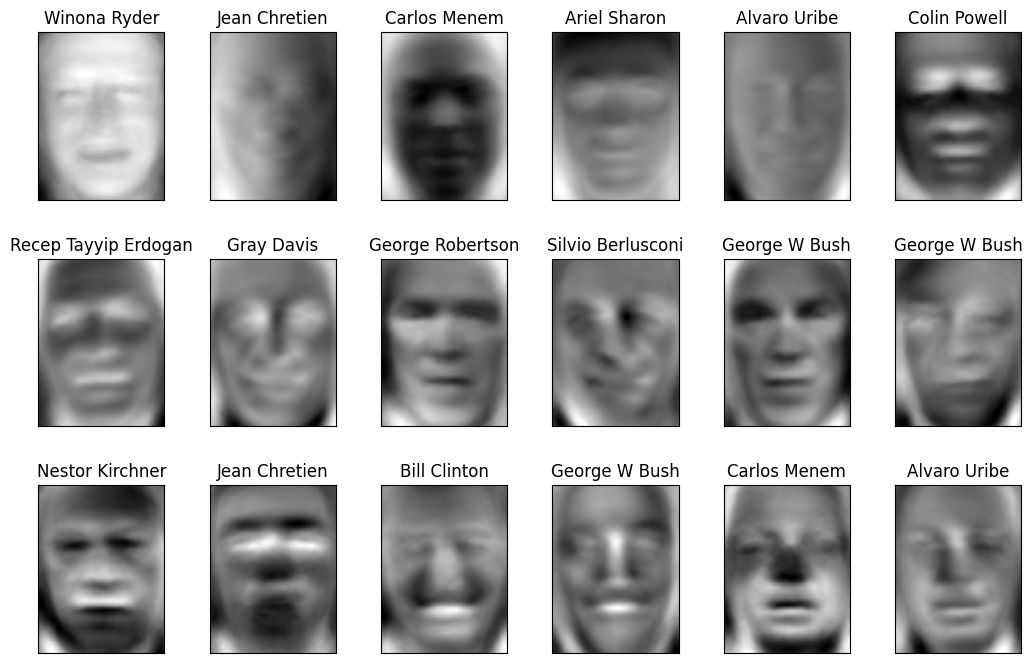

In [10]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(eigenfaces, names[y], h, w) # defaults to showing a 3 by 6 subset of the faces

## PCA For Image Classification



# Implement Neural Network Classifier on this data with and without PCA and report the following observations.

--Performacnes before and after PCA

--Execution time before and after PCA

--Does Scaling help?

--Does parameter tuning help?

--How many components are reasonable to get good performance?

In [11]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# 1. Without Sacling and PCA
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

start_time = time.time()

mlp_no_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_no_pca.fit(X_train, y_train)

y_pred_no_pca = mlp_no_pca.predict(X_test)
end_time_no_pca = time.time()

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
execution_time_no_pca = end_time_no_pca - start_time

print("Performance without PCA:")
# Get unique class labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_no_pca)))

# Use unique labels in classification_report
print(classification_report(y_test, y_pred_no_pca, labels=unique_labels))
print(f"Execution Time: {execution_time_no_pca:.2f} seconds")
print(f"Accuracy: {accuracy_no_pca:.2f}")

Performance without PCA:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00         5
          14       0.16      1.00      0.28       123
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        16
  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bei

In [13]:
# 2. Wihout Scaling With PCA
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

start_time = time.time()

# Apply PCA for dimensionality reduction
n_components = 300
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the MLP classifier on the PCA-transformed data
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = mlp_pca.predict(X_test_pca)
end_time_pca = time.time()

# Evaluate performance
accuracy_pca = accuracy_score(y_test, y_pred_pca)
execution_time_pca = end_time_pca - start_time

print("\nPerformance with PCA:")

# Get unique class labels for classification report
unique_labels = np.unique(np.concatenate((y_test, y_pred_pca)))

print(classification_report(y_test, y_pred_pca, labels=unique_labels))
print(f"Execution Time: {execution_time_pca:.2f} seconds")
print(f"Accuracy: {accuracy_pca:.2f}")



Performance with PCA:
              precision    recall  f1-score   support

           0       0.33      0.42      0.37        12
           1       0.55      0.67      0.60         9
           2       0.00      0.00      0.00        10
           3       0.33      0.20      0.25        10
           4       0.20      0.17      0.18         6
           5       0.41      0.61      0.49        18
           6       0.18      0.11      0.14        18
           7       0.80      0.57      0.67         7
           8       0.60      0.50      0.55         6
           9       0.25      0.20      0.22         5
          10       0.63      0.69      0.66        71
          11       0.14      0.25      0.18         4
          12       0.46      0.44      0.45        36
          13       0.50      0.60      0.55         5
          14       0.58      0.87      0.69       123
          15       0.31      0.53      0.39        17
          16       1.00      0.50      0.67        16
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# 1. Without PCA
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

start_time = time.time()
scaler_no_pca = StandardScaler()
X_train_scaled_no_pca = scaler_no_pca.fit_transform(X_train)
X_test_scaled_no_pca = scaler_no_pca.transform(X_test)

mlp_no_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_no_pca.fit(X_train_scaled_no_pca, y_train)

y_pred_no_pca = mlp_no_pca.predict(X_test_scaled_no_pca)
end_time_no_pca = time.time()

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
execution_time_no_pca = end_time_no_pca - start_time

print("Performance without PCA:")
# Get unique class labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_no_pca)))

# Use unique labels in classification_report
print(classification_report(y_test, y_pred_no_pca, labels=unique_labels))
print(f"Execution Time: {execution_time_no_pca:.2f} seconds")
print(f"Accuracy: {accuracy_no_pca:.2f}")

Performance without PCA:
              precision    recall  f1-score   support

           0       0.31      0.42      0.36        12
           1       0.45      0.56      0.50         9
           2       0.67      0.20      0.31        10
           3       0.25      0.10      0.14        10
           4       0.40      0.33      0.36         6
           5       0.50      0.67      0.57        18
           6       0.33      0.11      0.17        18
           7       0.75      0.43      0.55         7
           8       0.50      0.50      0.50         6
           9       0.33      0.60      0.43         5
          10       0.80      0.75      0.77        71
          11       0.40      0.50      0.44         4
          12       0.84      0.44      0.58        36
          13       0.57      0.80      0.67         5
          14       0.66      0.83      0.73       123
          15       0.34      0.65      0.45        17
          16       0.71      0.75      0.73        16
  

In [15]:
# 2. With PCA
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

start_time = time.time()

# Apply PCA for dimensionality reduction
n_components = 300
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Scale the PCA-transformed data
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train_pca)
X_test_scaled_pca = scaler_pca.transform(X_test_pca)

# Train the MLP classifier on the PCA-transformed data
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_pca.fit(X_train_scaled_pca, y_train)

# Make predictions on the test set
y_pred_pca = mlp_pca.predict(X_test_scaled_pca)
end_time_pca = time.time()

# Evaluate performance
accuracy_pca = accuracy_score(y_test, y_pred_pca)
execution_time_pca = end_time_pca - start_time

print("\nPerformance with PCA:")

# Get unique class labels for classification report
unique_labels = np.unique(np.concatenate((y_test, y_pred_pca)))

print(classification_report(y_test, y_pred_pca, labels=unique_labels))
print(f"Execution Time: {execution_time_pca:.2f} seconds")
print(f"Accuracy: {accuracy_pca:.2f}")



Performance with PCA:
              precision    recall  f1-score   support

           0       0.33      0.42      0.37        12
           1       0.60      0.67      0.63         9
           2       0.00      0.00      0.00        10
           3       0.33      0.20      0.25        10
           4       0.20      0.17      0.18         6
           5       0.41      0.61      0.49        18
           6       0.18      0.11      0.14        18
           7       0.80      0.57      0.67         7
           8       0.60      0.50      0.55         6
           9       0.25      0.20      0.22         5
          10       0.63      0.69      0.66        71
          11       0.14      0.25      0.18         4
          12       0.44      0.44      0.44        36
          13       0.50      0.60      0.55         5
          14       0.58      0.87      0.69       123
          15       0.31      0.53      0.39        17
          16       1.00      0.50      0.67        16
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
